# <span style="color: #FF0000">Prix d'un appartement à Boston</span>

In [1]:
# Code source diabetes: Jaques Grobler
# License: BSD 3 clause
# Application to boston dataset and modifications: Jeremy Camponovo

License = """
Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
"""

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import Dropdown, HTMLMath, interact, widgets, Image, HBox,VBox,Tab,Label,Textarea,Layout
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib notebook

In [5]:
boston = datasets.load_boston()

### import des bibliotheques necessaires

```python
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
```

### Chargement du jeu de données et affichage de la description

```python
boston = datasets.load_boston()

print(boston['DESCR'])
```

In [3]:
boston = datasets.load_boston()

```
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
```

### Régression linéaire sur chaque propriété prise séparément des autres

```python
feature_descr = ["per capita crime rate by town\n", "proportion of residential land zoned\nfor lots over 25,000 sq.ft.", "proportion of non-retail business acres per town","Charles River dummy variable\n(= 1 if tract bounds river; 0 otherwise)", "nitric oxides concentration (parts per 10 million)\n","average number of rooms per dwelling\n", "proportion of owner-occupied units built prior to 1940\n","weighted distances to five Boston employment centres\n", "index of accessibility to radial highways\n","full-value property-tax rate per $10,000\n", "pupil-teacher ratio by town\n","1000(Bk - 0.63)^2 where Bk is\nthe proportion of blacks by town", "% lower status of the population\n"]

for i in range(len(boston['feature_names'])):
    
    # Use only one feature
    print(boston['feature_names'][i])
    
    # Split the data and targets into training/testing sets
    boston_xtrain, boston_xtest, boston_ytrain, boston_ytest = train_test_split(boston.data[:, np.newaxis, i], boston.target, train_size=0.90)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(boston_xtrain, boston_ytrain)

    # Make predictions using the testing set
    boston_ypred = regr.predict(boston_xtest)
    
    # Usefull to plot the regression curve
    boston_ymodel = regr.predict(boston_xtrain)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    print(" ")
    
    # The mean squared error
    print("Mean squared error: %.2f"
      % mean_squared_error(boston_ytest, boston_ypred))
    print(" ")

    # Explained variance score: 1 is perfect prediction
    print('Variance score (1 is perfect, the higher the better): %.2f' % r2_score(boston_ytest, boston_ypred))

    # Plot outputs
    plt.figure(boston['feature_names'][i])
    plt.title(feature_descr[i])
    plt.xlabel(boston['feature_names'][i])
    plt.ylabel("target")
    
    # Training set in gray
    plt.scatter(boston_xtrain, boston_ytrain,  color='gray')
    
    #Testing set in red
    plt.scatter(boston_xtest, boston_ytest,  color='red')
    
    # Regression curve in blue
    plt.plot(boston_xtrain, boston_ymodel, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())
    plt.show()
```

In [6]:
data = ["CRIM\nCoefficients: -0.40180359\nMean squared error: 67.60\nVariance score (1 is perfect, the higher the better): 0.18\n"
        ,"ZN\nCoefficients: 0.13909333\nMean squared error: 58.52\nVariance score (1 is perfect, the higher the better): 0.18"
        ,"INDUS\nCoefficients: -0.6579396\nMean squared error: 70.18\nVariance score (1 is perfect, the higher the better): 0.15"
        ,"CHAS\nCoefficients: 6.72\nMean squared error: 78.36\nVariance score (1 is perfect, the higher the better): 0.01"
        ,"NOX\nCoefficients: -34.29919022\nMean squared error: 51.68\nVariance score (1 is perfect, the higher the better): 0.11"
        ,"RM\nCoefficients: 8.85165208\nMean squared error: 68.53\nVariance score (1 is perfect, the higher the better): 0.47"
        ,"AGE\nCoefficients: -0.1264827\nMean squared error: 88.38\nVariance score (1 is perfect, the higher the better): 0.05"
        ,"DIS\nCoefficients: 1.1535337\nMean squared error: 100.78\nVariance score (1 is perfect, the higher the better): -0.07"
        ,"RAD\nCoefficients: -0.38795677\nMean squared error: 102.62\nVariance score (1 is perfect, the higher the better): 0.08"
        ,"TAX\nCoefficients: -0.02689801\nMean squared error: 52.96\nVariance score (1 is perfect, the higher the better): -0.04"
        ,"PTRATIO\nCoefficients: -2.18844876\nMean squared error: 44.73\nVariance score (1 is perfect, the higher the better): 0.22"
        ,"B\nCoefficients: 0.03259125\nMean squared error: 83.01\nVariance score (1 is perfect, the higher the better): 0.14"
        ,"LSTAT\nCoefficients: -0.91278669\nMean squared error: 68.11\nVariance score (1 is perfect, the higher the better): 0.48"]

file_b = []
image_b = []
wimage_b = []
wHTML_b = []
children_b = []
i = 0
for name in boston['feature_names']:
    file_b.append(open("./img_boston/{}.png".format(name),'rb'))
    image_b.append(file_b[-1].read())
    wimage_b.append(Image(
    value=image_b[-1],
    format='png',
    width='600px',
    height='300px',
))
    wHTML_b.append(Textarea(value=data[i],
    disabled=True,
    layout=Layout(width='95%', height='120px'),
))
    children_b.append(VBox([wHTML_b[-1],wimage_b[-1]]))
    i+=1
    
tab_contents = boston['feature_names']
tab = Tab()
tab.children = children_b
for i in range(len(children_b)):
    tab.set_title(i, boston['feature_names'][i])
display(tab)

FileNotFoundError: [Errno 2] No such file or directory: './img_boston/CRIM.png'

Textarea(value='', disabled=True, layout=Layout(height='100px', width='95%'))

<IPython.core.display.Javascript object>


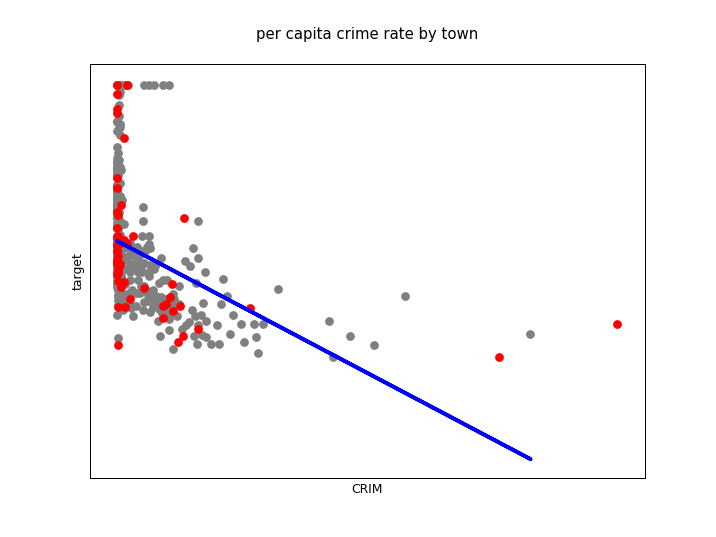

interactive(children=(Dropdown(description='parameter', options=('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', '…

In [7]:
feature_descr = ["per capita crime rate by town\n","proportion of residential land zoned\nfor lots over 25,000 sq.ft.",
                 "proportion of non-retail business acres per town","Charles River dummy variable\n(= 1 if tract bounds river; 0 otherwise)",
                 "nitric oxides concentration (parts per 10 million)\n","average number of rooms per dwelling\n",
                 "proportion of owner-occupied units built prior to 1940\n","weighted distances to five Boston employment centres\n",
                 "index of accessibility to radial highways\n","full-value property-tax rate per $10,000\n",
                 "pupil-teacher ratio by town\n","1000(Bk - 0.63)^2 where Bk is\nthe proportion of blacks by town",
                 "% lower status of the population\n"]
texte=[]
bxtr = []
bxte = []
bytr = []
byte = []
bypr = []
bymo = []
for i in range(len(boston['feature_names'])):
    t = ""
    # Use only one feature
    t+=boston['feature_names'][i]
    t+="\n"
    
    # Split the data and targets into training/testing sets
    boston_xtrain, boston_xtest, boston_ytrain, boston_ytest = train_test_split(boston.data[:, np.newaxis, i], boston.target, train_size=0.90)
    bxtr.append(boston_xtrain)
    bxte.append(boston_xtest)
    bytr.append(boston_ytrain)
    byte.append(boston_ytest)
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(boston_xtrain, boston_ytrain)

    # Make predictions using the testing set
    boston_ypred = regr.predict(boston_xtest)
    bypr.append(boston_ypred)
    # Usefull to plot the regression curve
    boston_ymodel = regr.predict(boston_xtrain)
    bymo.append(boston_ymodel)
    # The coefficients
    #t+='Coefficients: \n'
    t+="target = {} X + {}".format(regr.coef_[0],regr.intercept_)
    t+="\n"
    
    # The mean squared error
    t+="Mean squared error (the lower the better): %.2f" % mean_squared_error(boston_ytest, boston_ypred)
    t+="\n"

    # Explained variance score: 1 is perfect prediction
    t+='Variance score (1 is perfect, the higher the better): %.2f' % r2_score(boston_ytest, boston_ypred)
    texte.append(t)
    # Plot outputs
info = Textarea(disabled=True,layout=Layout(width='95%', height='100px'))
display(info)

plt.figure("Boston house price dataset",figsize=[8,6])   
ax =plt.subplot(111)
plt.show()

@interact(parameter=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
def draw(parameter="CRIM"):
    global texte,info
    l=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
    dico={}
    for i in range(len(l)):
        dico[l[i]]=i
    ax.clear()
    i = dico[parameter]
    ax.set_title(feature_descr[i])
    ax.set_xlabel(boston['feature_names'][i])
    ax.set_ylabel("target")
    info.value=texte[i]
    # Training set in gray
    plt.scatter(bxtr[i], bytr[i],  color='gray')
    
    #Testing set in red
    plt.scatter(bxte[i], byte[i],  color='red')
    
    # Regression curve in blue
    plt.plot(bxtr[i], bymo[i], color='blue', linewidth=3)

    ax.set_xticks(())
    ax.set_yticks(())
    return





Coefficients: 
 [ 5.46072273 -0.6332896 ]
[8.78, 37.97]
[47.94514557144452, -24.0460061334636]
Mean squared error: 41.28
Variance score: 0.37


<IPython.core.display.Javascript object>


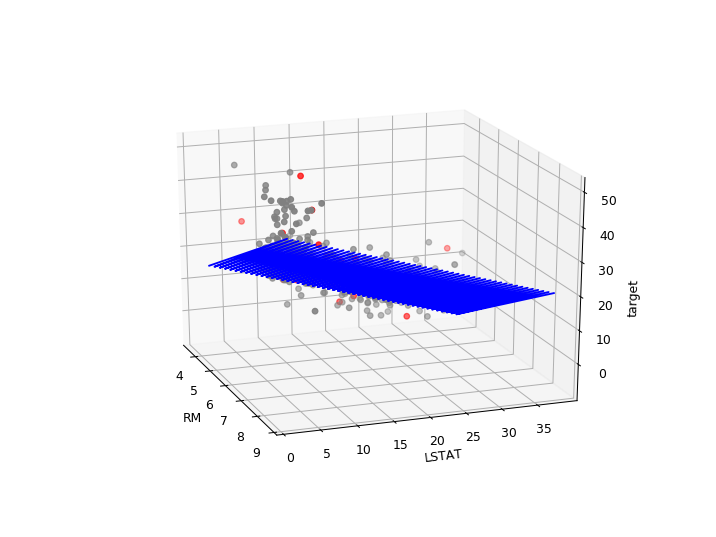

In [22]:
xtrain2 = xtrain[:,[5,12]]
xtest2 = xtest[:,[5,12]]
regr = linear_model.LinearRegression()
regr.fit(xtrain2,ytrain)
ypred = regr.predict(xtest2)
# The coefficients
print('Coefficients: \n', regr.coef_)
print([max(xtrain2[:,i]) for i in range(len(xtrain2[0]))])
print([max(xtrain2[:,i])*regr.coef_[i] for i in range(len(xtrain2[0]))])
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, ypred))

M1 = np.max(xtrain2[:,0])
M2 = np.max(xtrain2[:,1])
m1 = np.min(xtrain2[:,0])
m2 = np.min(xtrain2[:,1])

x1 = np.zeros((50*50,))
for i in range(50):
    x1[50*i:50*i+50] = np.linspace(m1,M1,50)
x2 = np.zeros((50*50,))
for i in range(50):
    x2[i::50] = np.linspace(m2,M2,50)
x3 = np.zeros((2500,2))
x3[:,0]=x1
x3[:,1]=x2
y2 = regr.predict(x3)


fig = plt.figure("deux axes",figsize=[8,6])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xtrain2[:,0],xtrain2[:,1],ytrain, color="gray")
ax.scatter(xtest2[:,0],xtest2[:,1],ytest,  color='red')
ax.plot(x1,x2,y2,color="blue")
#ax.set_xticks(())
#ax.set_yticks(())
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('target')
fig.show()

Modèle: 
Target = -0.10554090552342683 X1 + 0.03924419494395273 X2 + 0.029528287156836308 X3 + 3.1436603590227183 X4 + -15.618018973631685 X5 + 4.306731564241648 X6 + -0.011782930921036484 X7 + -1.382309625558392 X8 + 0.26053230688905954 X9 + -0.011420377905729785 X10 + -0.9359990072261022 X11 + 0.009510457797054499 X12 + -0.4886636420380973 X13 + 31.793280488910014
Mean squared error: 33.32
Variance score: 0.49


<IPython.core.display.Javascript object>


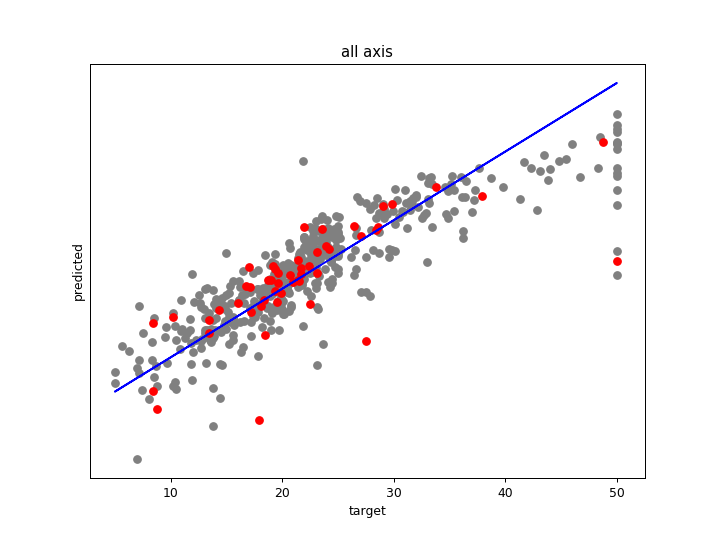

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(boston.data,boston.target, train_size=0.90)
regr = linear_model.LinearRegression()
regr.fit(xtrain,ytrain)
ypred = regr.predict(xtest)
ypred2 = regr.predict(xtrain)
# The coefficients
print('Modèle: \nTarget = '+' + '.join(['{} X{:d}'.format(regr.coef_[i],i+1) for i in range(len(regr.coef_))]) + " + {}".format(regr.intercept_))


print("Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, ypred))

plt.figure("tous les axes",figsize=[8,6])
plt.scatter(ytrain,ypred2,  color='gray')
plt.scatter(ytest,ypred,  color='red')

plt.plot(ytrain,ytrain,color="blue")
plt.xlabel("target")
plt.ylabel("predicted")
#plt.xticks(())
plt.yticks(())
plt.title("all axis")
#plt.savefig("touslesaxes.png")
plt.show()